# Predicting the Price of Cars

The objective of this exercise is to **predict the price of car** using all the numeric and Boolean attributes.

In [2]:
# This is used to plot inline
%matplotlib inline

# Importing all the required modules
import pandas as pd
import numpy as np

# seaborn is a plotting library
import seaborn as sb
import matplotlib.pyplot as plt

# scikit learn for ml algorithms
from sklearn.linear_model import LinearRegression

# To find the cross validation score
from sklearn.model_selection import cross_val_score

# to find the mean squared error and r2
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Importing the dataset using read_csv from pandas module
df = pd.read_csv('cars.data')

In [4]:
# Browsing the df
df.head(2)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


Clearly there are no column names, Lets add the header names.

In [5]:
# Adding column names
names = ["symboling","normalized-losses","make","fuel-type","aspiration",
         "num-of-doors","body-style","drive-wheels","engine-location",
         "wheel-base","length","width","height","curb-weight","engine-type",
         "num-of-cylinders","engine-size","fuel-system","bore","stroke",
         "compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg",
         "price"]

df.columns = names

df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


#### Missing values

There are missing values in the record which we observed, and missing values are denoted by '?'

In [6]:
# Finding the number of missing values

# Check the dimensions of df
df.shape

# There are 204 rows and 26 attributes.

(204, 26)

There are in total 204 rows and with 26 attributes each.

In [7]:
# I will simply remove the rows with missing values which are represented by '?'

# Storing the original dataset to preserve the purity of input
original_df = df

for col in names:
    df = df[df[col].map(str) != "?"]

In [8]:
df.shape

(159, 26)

#### Observations

- After removing the rows with missing values, we are left with 159 rows
- Looking at the breadth, the depth is not sufficient to perform concrete data analysis.
- The sample is definetly not a good representative of the universe but we will continue with this limited data set.

## Predicting variable or dependent variable.

In this study we are predicting the **price** variable, given the information of the 25 other independent variables.

We can use the following 25 attributes to predict **price**:
symboling, normalized-losses, make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, wheel-base, length, width, height, curb-weight, engine-type, num-of-cylinders, engine-size, fuel-system, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg and highway-mpg

### Performing descriptive statistics to eliminate the independent variables with redundant information:

I will use the seaborn module to plot the pair plot, which can be used for descriptive analysis.

In [9]:
# Checking the datatype of columns
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Most of the columns have wrong datatype, In this step, I will change the column data types.

In [10]:
# Changing the data type
# Store the column names who's datatype needs to be changed in colToChange
colToChange = ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]

df[colToChange] = df[colToChange].astype(np.float64) 

df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

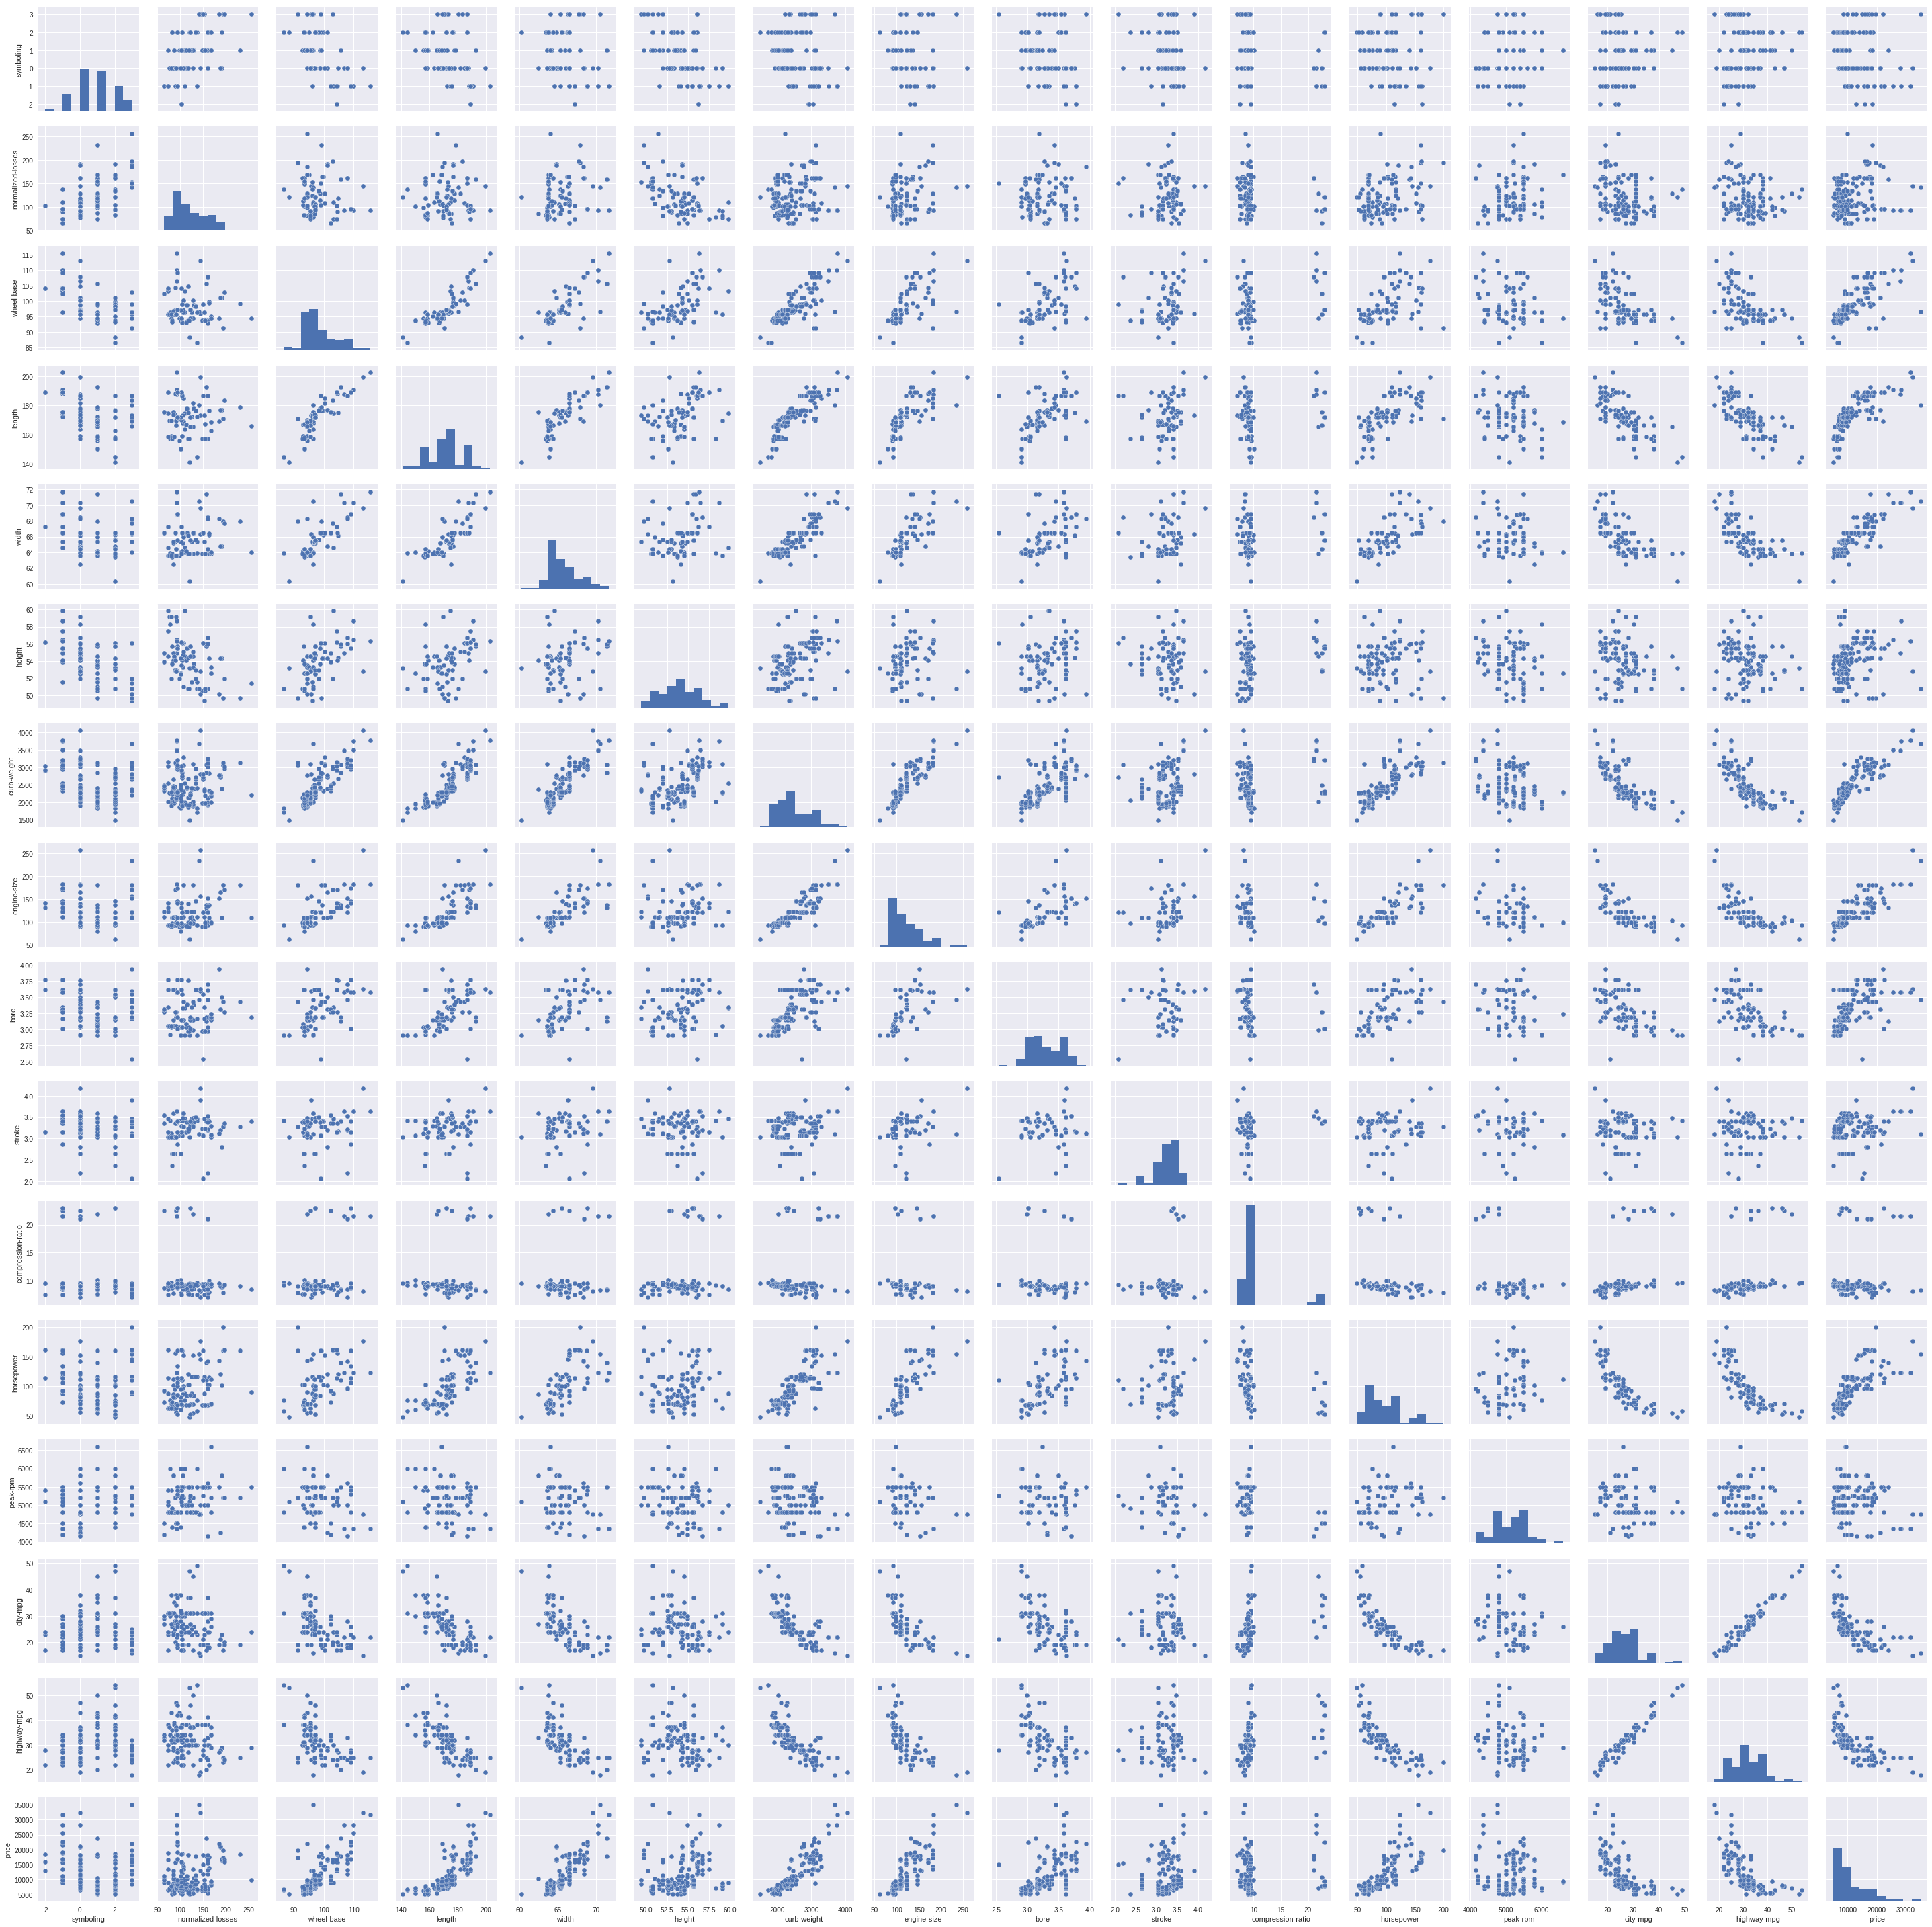

In [10]:
# Plotting the pair plot
pairPlot = sb.pairplot(df)

#### Insights from pair plot

> - Some of the attributes like width, curb-weight, engine-size have linear relationship with our target variable i.e. price. (Reference the last row in the pair plot)
> - The independent attributes like highway-mpg vs city-mpg and wheel-base vs length have strong linear relationship between them. So it will be sensible to drop the redundant information i.e. drop one of the variables while doing the prediction.

### Finding the correlation between attributes
 
I will use correlation matrix to analyse the correlation between attributes as well as target variable(price).

In [11]:
# Creating correlation matrix
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.518344,-0.520591,-0.336257,-0.219186,-0.475185,-0.251880,-0.109453,-0.256469,-0.021285,-0.138316,-0.003949,0.199106,0.089550,0.149830,-0.162794
normalized-losses,0.518344,1.000000,-0.060086,0.035541,0.109726,-0.413702,0.125858,0.207820,-0.031558,0.063330,-0.127259,0.290511,0.237697,-0.235523,-0.188564,0.202761
wheel-base,-0.520591,-0.060086,1.000000,0.871534,0.814991,0.555767,0.810181,0.649206,0.578159,0.167449,0.291431,0.516948,-0.289234,-0.580657,-0.611750,0.734419
length,-0.336257,0.035541,0.871534,1.000000,0.838338,0.499251,0.871291,0.725953,0.646318,0.121073,0.184814,0.672063,-0.234074,-0.724544,-0.724599,0.760952
width,-0.219186,0.109726,0.814991,0.838338,1.000000,0.292706,0.870595,0.779253,0.572554,0.196619,0.258752,0.681872,-0.232216,-0.666684,-0.693339,0.843371
height,-0.475185,-0.413702,0.555767,0.499251,0.292706,1.000000,0.367052,0.111083,0.254836,-0.091313,0.233308,0.034317,-0.245864,-0.199737,-0.226136,0.244836
curb-weight,-0.251880,0.125858,0.810181,0.871291,0.870595,0.367052,1.000000,0.888626,0.645792,0.173844,0.224724,0.790095,-0.259988,-0.762155,-0.789338,0.893639
engine-size,-0.109453,0.207820,0.649206,0.725953,0.779253,0.111083,0.888626,1.000000,0.595737,0.299683,0.141097,0.812073,-0.284686,-0.699139,-0.714095,0.841496
bore,-0.256469,-0.031558,0.578159,0.646318,0.572554,0.254836,0.645792,0.595737,1.000000,-0.102581,0.015119,0.560239,-0.312269,-0.590440,-0.590850,0.533890
stroke,-0.021285,0.063330,0.167449,0.121073,0.196619,-0.091313,0.173844,0.299683,-0.102581,1.000000,0.243587,0.148804,-0.011312,-0.020055,-0.012934,0.160664


### Pearson correlation heatmap

Let us generate a heatmap using correlation data using seaborn library.

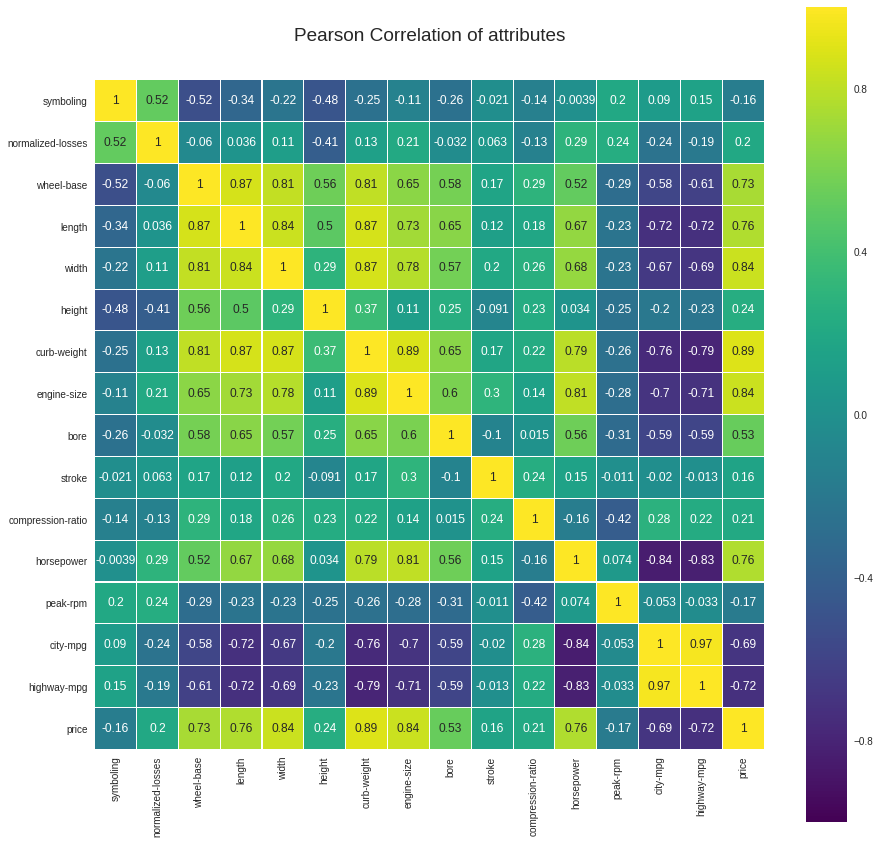

In [15]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sb.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)



#### Insights from correlation matrix and heatmap

> - wheel-base has strong positive correlation with length, width, curb-weight and price i.e r > 0.7
> - length has strong positive correlation with width, curb-weight, engine-size and price; and strong negative correlation with city-mpg and highway-mpg
> - width has strong positive correlation with curb-weight, engine-size and price; and moderate negative correlation with city_mpg and highway_mpg
> - crub-weight has strong positive correlation with engine-size, horsepower and price; and strong negative correlation with city_mpg and highway_mpg
> - engine-size has strong positive correlation with horsepower and price; and strong negative correlation with city_mpg and highway_mpg
> - bore has moderate positive correlation with price
> - horsepower has strong positive correlation with price
> - city-mpg and highway-mpg have very strong positive correlation close to 1.
> - height, stroke, compression-ratio and peak rpm of the cars does not have a significant corelation with any of the attributes


## Prediction

After analysing the pair plot and correlation matrix, we can conclude that many attributes have some form of linear relation with our target variable i.e. price and also among themselves, So I will perform prediction using **linear regression model** which should give good accuracy.

In [12]:
# Using scikit learn linear_model
# I'm using entire dataset for test and train
xTrain = df.loc[:, df.columns != "price"]
yTrain = df.loc[:, df.columns == "price"]


In [13]:
regr = LinearRegression()

In [14]:
# Encode the categorical variables as scikit learn only excepts numeric
# Encoding the categorical attributes using one hot encoding from pandas library

xTrainTransformed = pd.get_dummies(xTrain)
xTrainTransformed.head(2)


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi
2,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,...,0,1,0,0,0,0,0,0,1,0
3,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,...,1,0,0,0,0,0,0,0,1,0


In [15]:
# Fitting the linear regression model

regr.fit(xTrainTransformed, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
# Make predictions using the same train dataset
pricePred = regr.predict(xTrainTransformed)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(yTrain, pricePred))
# Explained variance score: 1 is perfect prediction
print("R square score: %.2f" % r2_score(yTrain, pricePred))

Coefficients: 
 [[ -5.06782067e+00   5.57745743e+00   3.18440516e+02  -7.66265939e+01
    2.43692078e+02  -3.35218743e+02   5.20820204e+00  -1.24383274e+01
   -8.81685811e+02  -5.67659597e+02  -7.00029130e+02  -2.01921715e+01
   -5.37667383e-01  -1.56388896e+02   1.28416202e+02   2.54241987e+03
    2.90203056e+03  -2.20296786e+03  -3.66677163e+03   9.59707404e+02
    4.97321744e+03  -1.52023958e+03   5.09075793e+03  -3.78517612e+03
   -1.14726189e+03  -3.43027774e+03  -3.48253151e+03   7.37282819e+03
    2.13838109e+03  -1.33327973e+03  -3.32698767e+03  -1.75492656e+03
   -3.28922195e+02   2.75085099e+03  -2.75085099e+03  -1.08574519e+03
    1.08574519e+03   4.19034389e+02  -4.19034389e+02   4.54254539e+03
   -1.08432500e+03  -1.19344225e+03  -1.15988579e+03  -1.10489235e+03
   -6.49277004e+02  -6.78633872e+02   1.32791088e+03   4.54747351e-13
    2.10771632e+03  -1.73946326e+03   1.94460200e+02  -1.33327973e+03
    7.70566467e+02   2.52049220e+03  -1.58757226e+03  -2.16797488e+03
   -

#### Insights

The r square value is very high possibly because I've used the same training data set, so I will calculate the r2 value using 5 fold cross validation technique. The reason for using same training data set for prediction is, the depth of the dataset is very small.

#### 5-fold cross-validation

In [18]:
# Performing 5 fold cross validation
scores = cross_val_score(regr, xTrainTransformed, yTrain, cv=5, scoring='r2')

In [19]:
# print scores for different folds
scores

array([ 0.6443799 ,  0.82236404,  0.60376662,  0.48062675,  0.74952565])

In [20]:
# print the mean score of r2
scores.mean()

0.66013259155805992

#### Insights 

Though the mean square of linear regression algorith is 0.66, we have to keep in mind that the dataset depth is very small and also same training data set is used for testing.

# Conclusion 

We have analysed the data and used all the attributes to predict the price of a car. The main drawback in this exercise was the depth of the dataset. After analysing pair plot and correlation matrix, the Linear regression algorithmn seamed to be likely to give a better accuracy, because many variables were moderately linearly related. 

None of the variables were dropped for this prediction. As future work , we need to collect more data and to use more advanced techniques like artificial neural networks to predict car prices. 